# DS 160 Final Project - Lung Cancer Prediction

In [1]:
# importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
# loading and viewing dataset
dataset=pd.read_csv('cancer patient data.csv')

In [3]:
dataset.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [4]:
dataset.tail(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
990,990,P990,49,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
991,991,P991,37,1,8,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
992,992,P992,26,2,7,7,7,7,7,6,...,2,7,6,7,6,7,2,3,1,High
993,993,P993,37,2,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
994,994,P994,33,1,6,7,7,7,7,7,...,8,5,7,6,7,8,7,6,2,High
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [5]:
# looking at statisics
dataset.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [6]:
# looking at information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
# looking at column names
dataset.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [8]:
# looking at number of rows and columns
dataset.shape # there are 1000 rows and 26 columns

(1000, 26)

In [9]:
# Looking at the amount per level
dataset['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [10]:
dataset['Smoking'].value_counts()

Smoking
2    222
7    207
1    181
3    172
8     89
6     60
4     59
5     10
Name: count, dtype: int64

In [11]:
dataset['Gender'].value_counts()

Gender
1    598
2    402
Name: count, dtype: int64

### Checking for null values

In [12]:
# checking for null values
dataset.isna().sum() # there are zero null values

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### Deleting Columns

In [13]:
del dataset['index']

In [14]:
del dataset['Patient Id']

In [15]:
# checking if columns were deleted
dataset.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


## Exploratory Data Analysis (EDA)

<Axes: xlabel='Age', ylabel='Count'>

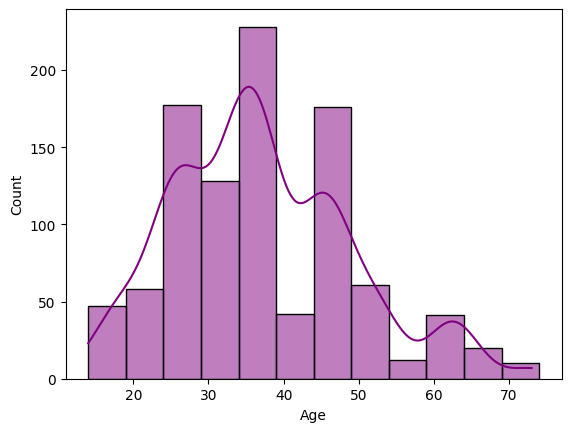

In [16]:
# Looking at distribution of data
# histogram of age
sns.histplot(x='Age', data=dataset, kde=True, binwidth=5, color='purple')

<Axes: xlabel='chronic Lung Disease', ylabel='Count'>

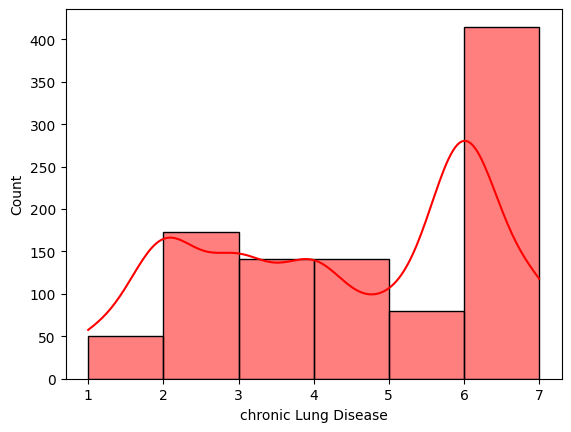

In [17]:
# histogram of chronic lung disease
sns.histplot(x='chronic Lung Disease', data=dataset, binwidth=1, kde=True, color='red')

<Axes: xlabel='Dust Allergy', ylabel='Count'>

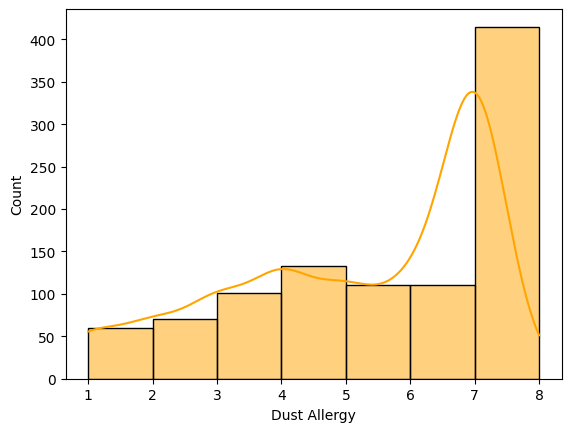

In [18]:
# histogram of dust allergy
sns.histplot(x='Dust Allergy', data=dataset, binwidth=1, kde=True, color='orange')

<Axes: xlabel='Balanced Diet', ylabel='Count'>

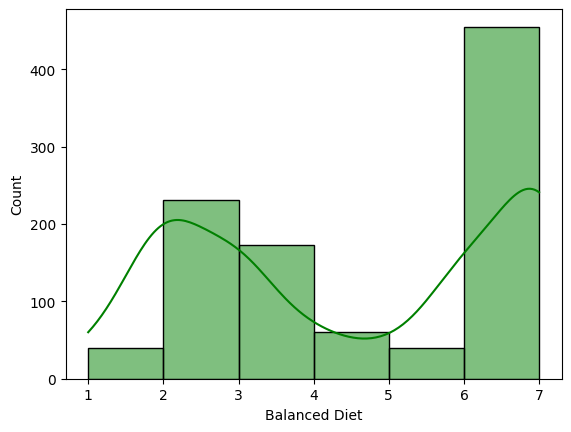

In [19]:
# histogram of balanced diet
sns.histplot(x='Balanced Diet', data=dataset, binwidth=1, kde=True, color='green')

<Axes: xlabel='Air Pollution', ylabel='Count'>

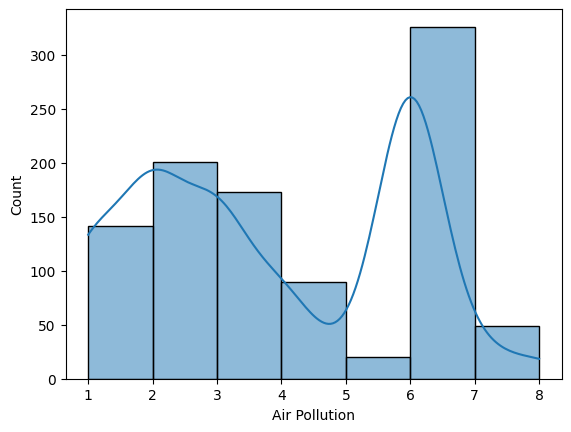

In [20]:
sns.histplot(x='Air Pollution', binwidth=1, data=dataset, kde=True)

<Axes: xlabel='Alcohol use', ylabel='Count'>

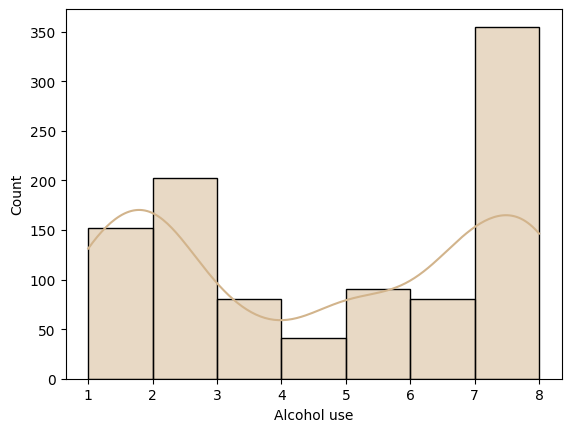

In [21]:
sns.histplot(x='Alcohol use', binwidth=1, data=dataset, kde=True, color='tan')

<Axes: xlabel='OccuPational Hazards', ylabel='Count'>

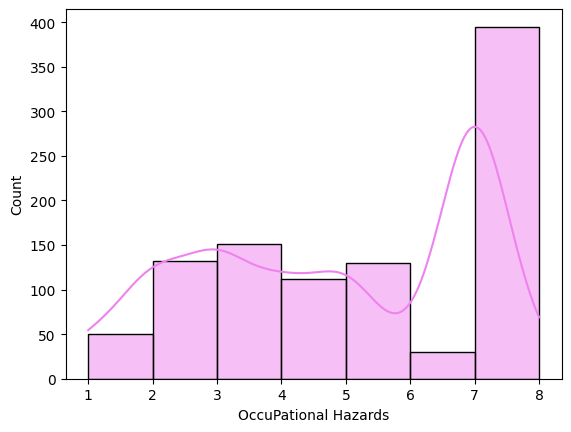

In [22]:
sns.histplot(x='OccuPational Hazards', binwidth=1, data=dataset, kde=True, color='violet')

<Axes: xlabel='Genetic Risk', ylabel='Count'>

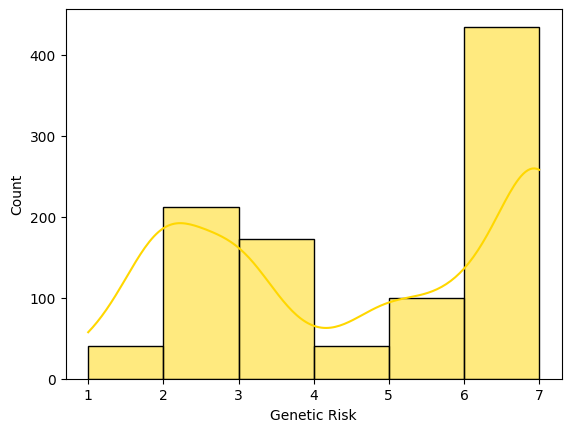

In [23]:
sns.histplot(x='Genetic Risk', binwidth=1, data=dataset, kde=True, color='gold')

<Axes: xlabel='Obesity', ylabel='Count'>

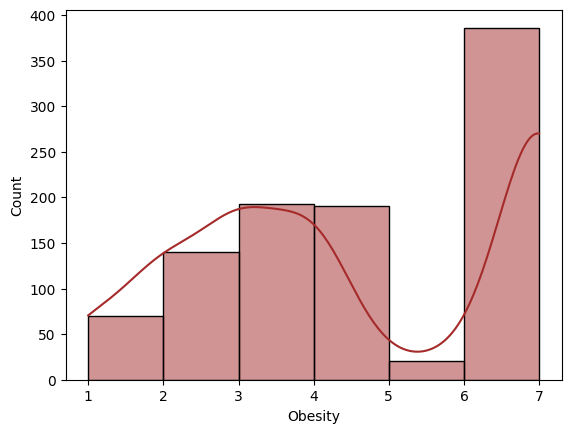

In [24]:
sns.histplot(x='Obesity', binwidth=1, data=dataset, kde=True, color='brown')

<Axes: xlabel='Smoking', ylabel='Count'>

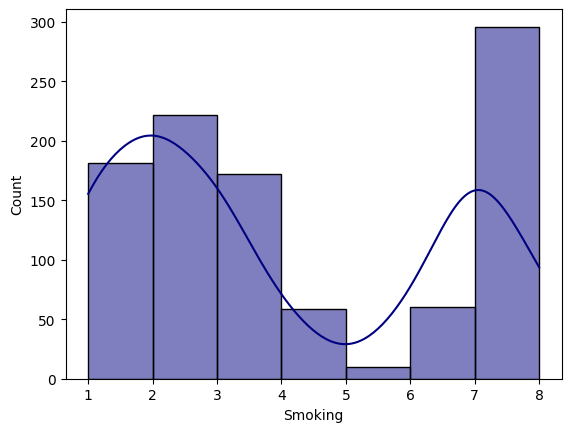

In [25]:
sns.histplot(x='Smoking', binwidth=1, data=dataset, kde=True, color='navy')

<Axes: xlabel='Passive Smoker', ylabel='Count'>

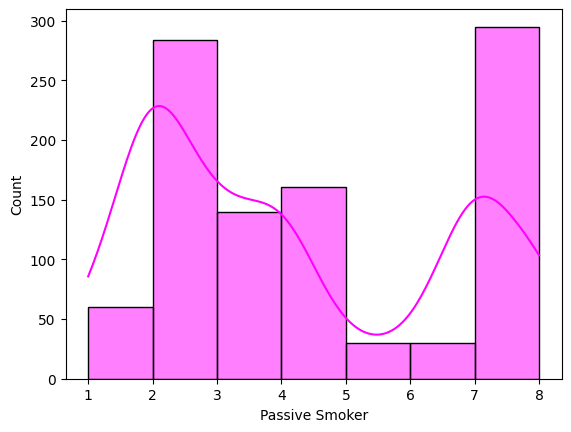

In [26]:
sns.histplot(x='Passive Smoker', binwidth=1, data=dataset, kde=True, color='magenta')

<Axes: xlabel='Gender', ylabel='Count'>

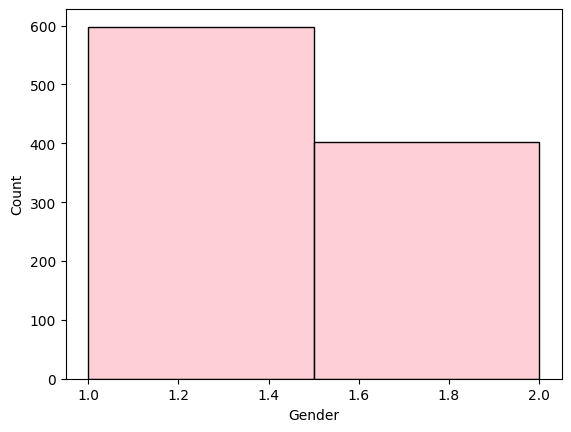

In [27]:
sns.histplot(x='Gender', binwidth=0.5, data=dataset, color='pink')

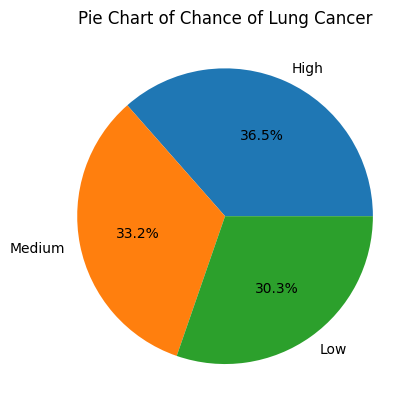

In [28]:
# pie chart of the levels
plt.pie(dataset['Level'].value_counts(), labels=['High', 'Medium', 'Low'], autopct='%0.1f%%')
plt.title('Pie Chart of Chance of Lung Cancer')
plt.show()

### looking at possible correlations within the dataset for the symptoms (bar plots)

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Smoking')

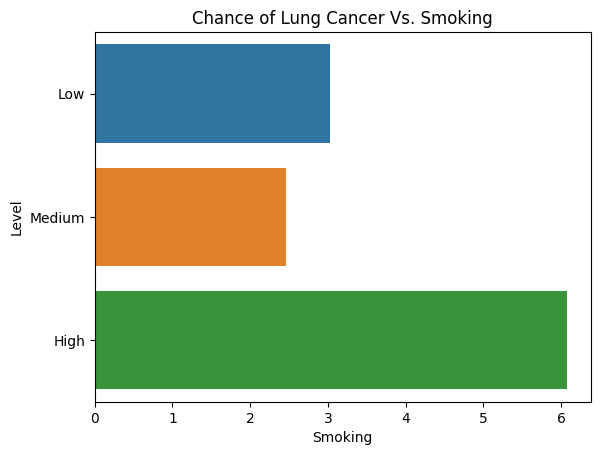

In [29]:
# bar plot of smoking and level
sns.barplot(x='Smoking', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Smoking')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Passive Smoking')

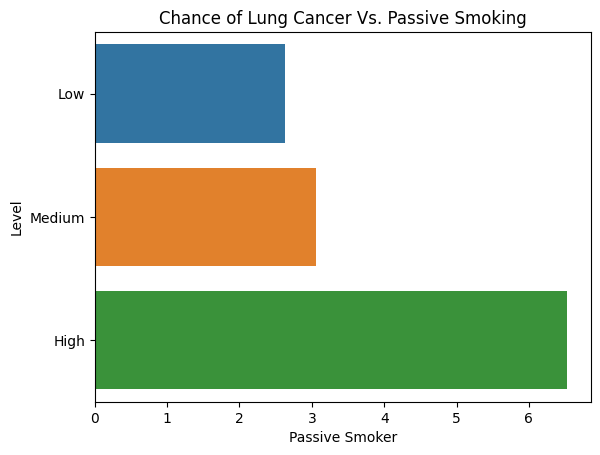

In [30]:
# bar plot of passive smaoking and level
sns.barplot(x='Passive Smoker', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Passive Smoking')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Alcohol Use')

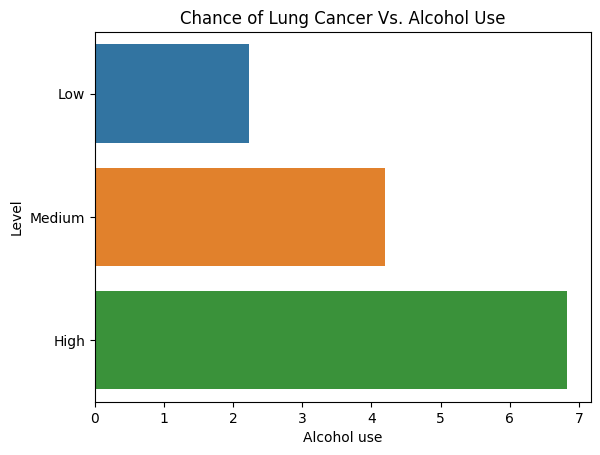

In [31]:
# bar plot of alcohol use and level
sns.barplot(x='Alcohol use', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Alcohol Use')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Genetic Risk')

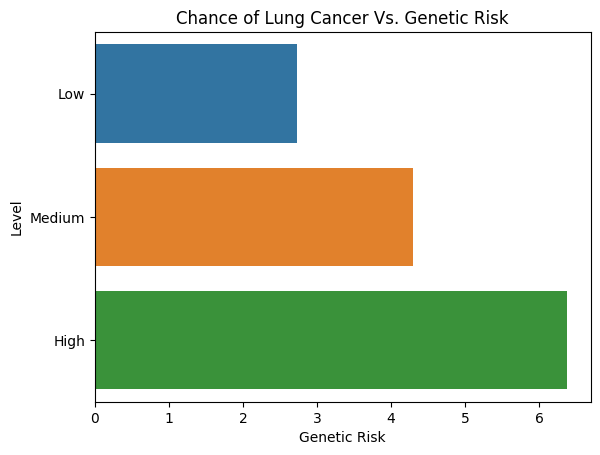

In [32]:
# bar plot of genetic risk and level
sns.barplot(x='Genetic Risk', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Genetic Risk')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Occupation Hazzards')

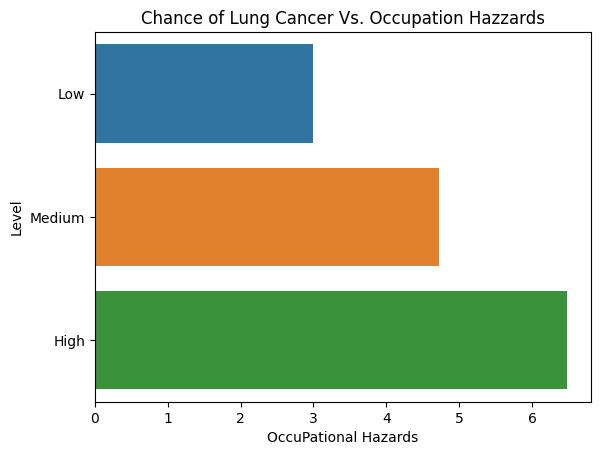

In [33]:
# bar plot of occupational hazzard and level
sns.barplot(x='OccuPational Hazards', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Occupation Hazzards')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Air Pollution')

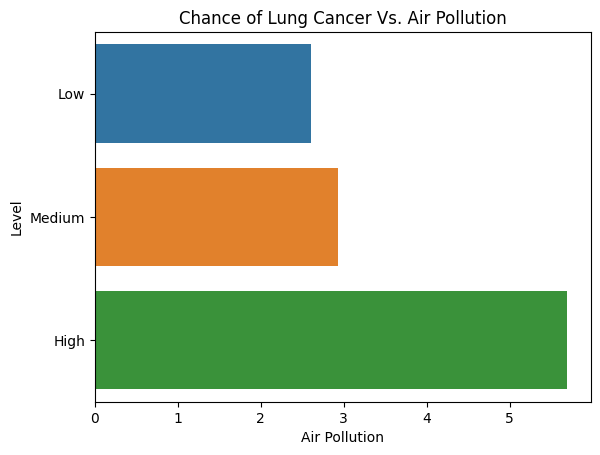

In [34]:
# bar plot of air pollution and level
sns.barplot(x='Air Pollution', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Air Pollution')

Text(0.5, 1.0, 'Chance of Lung Cancer Vs. Obesity')

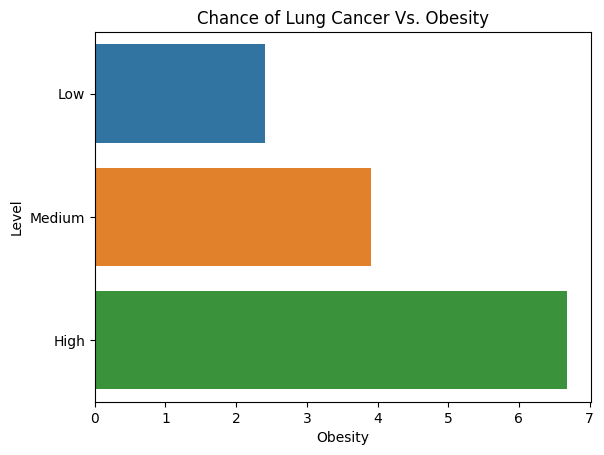

In [35]:
# bar plot of obesity and level
sns.barplot(x='Obesity', y='Level', data=dataset, ci=False)
plt.title('Chance of Lung Cancer Vs. Obesity')

Text(0.5, 1.0, 'Smoking Vs. Gender')

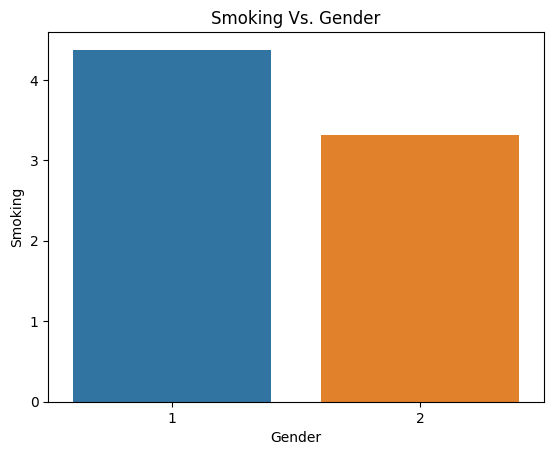

In [36]:
# barplot of smoking and gender
sns.barplot(x='Gender', y='Smoking', data=dataset, ci=False)
plt.title('Smoking Vs. Gender')

### looking at possible correlations within the dataset for the symptoms (Heat Maps)

<Axes: >

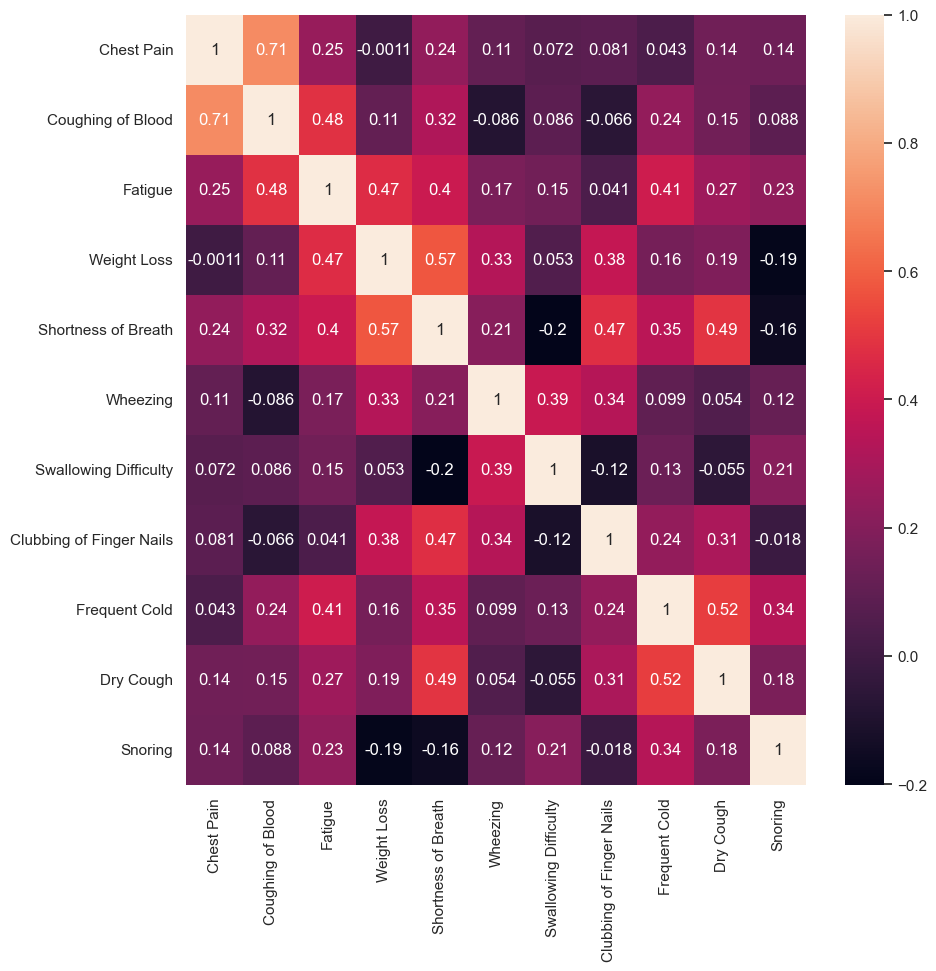

In [37]:
# setting figure size
sns.set(rc={'figure.figsize':(10,10)})

# creating heat map for symptoms
heat_map=dataset[['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']].corr()
cols=['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
sns.heatmap(heat_map, xticklabels=cols, yticklabels=cols, annot=True)

<Axes: >

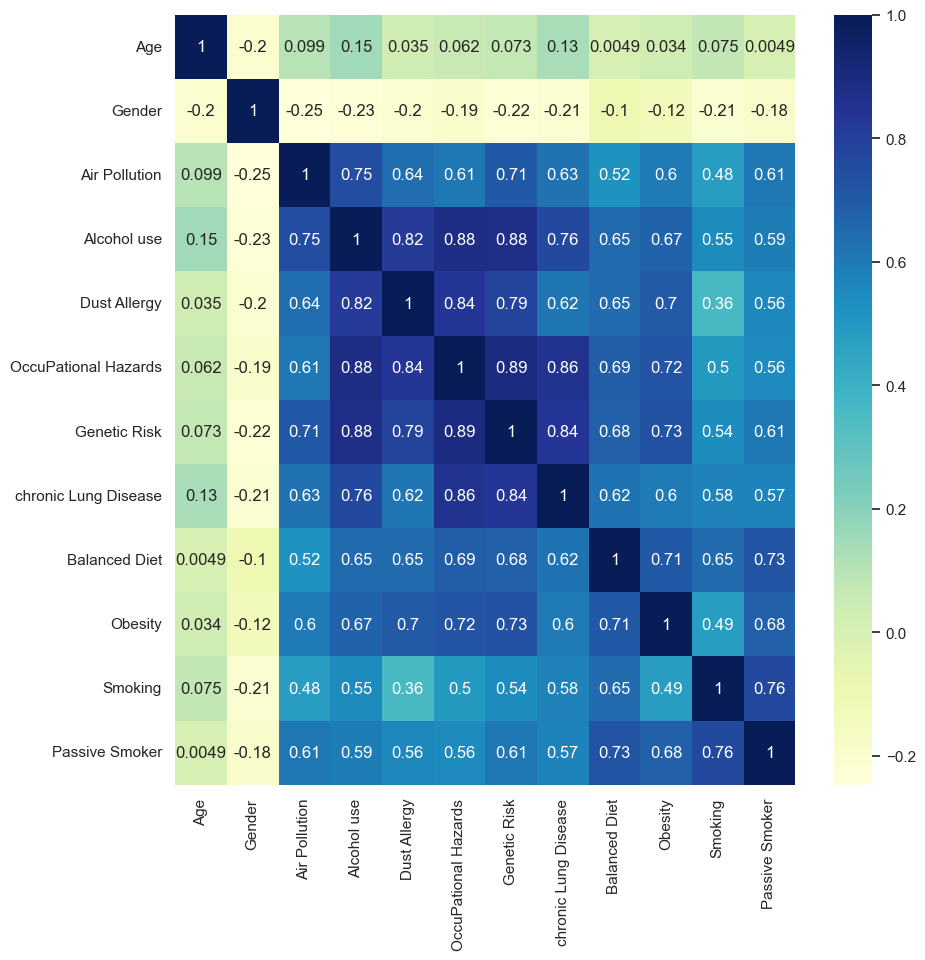

In [38]:
heat_map2=dataset[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 
                        'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 
                        'Smoking', 'Passive Smoker']].corr()
cols=['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 
                        'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 
                        'Smoking', 'Passive Smoker']
sns.heatmap(heat_map2,  xticklabels=cols, yticklabels=cols, annot=True, cmap="YlGnBu")

## Logistic Regression Analysis

### Creating independent and dependent variables to predict

In [39]:
dataset.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [40]:
# splitting the data into independent and dependent variables
x=dataset[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 
    'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 
    'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring']]
y=dataset[['Level']]

### Handling Categorical Y Variable

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
print(y)

[1 2 0 0 0 0 1 1 2 2 0 0 2 0 1 2 2 0 0 2 0 0 0 0 0 2 2 2 0 2 0 0 2 1 1 2 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 1 2 0 0 0 1 1 2 2 0 0 2 0 1 2 2 0 0 2 0 0 0 0 2 2 2 2 0 2 0 0 2 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 2 1 0 0 0 1 1 2 2 0 0 2 1 1 2 2 0 0 2 0 0 0 0 1 2 2 2 0 2 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 2 1 0 0 0 1 1 2 2 0 0 2 1 1 2 2 0 0 2 0 0 0 0 1 2 2 2 0 2 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 2 2 0 0 2 1 1 2 2 0 0 2 0 0 0 0 1 2 2 2 0 2 0 0 2 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 

### Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=0)

### Training the Logistic Regression model on the Training set

In [43]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train.values, y_train)

LogisticRegression()

### Predicting test set result

In [44]:
y_pred=classifier.predict(x_test.values)

In [45]:
y_pred[:8]

array([0, 2, 2, 0, 1, 2, 2, 2])

In [46]:
y_test[:8]

array([0, 2, 2, 0, 1, 2, 2, 2])

The predicted Y value and the tested Y value matched. This implies that the logistic regession model performed very well.

### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[115   1   0]
 [  1 110   2]
 [  0   2  99]]


In [48]:
classifier.classes_

array([0, 1, 2])

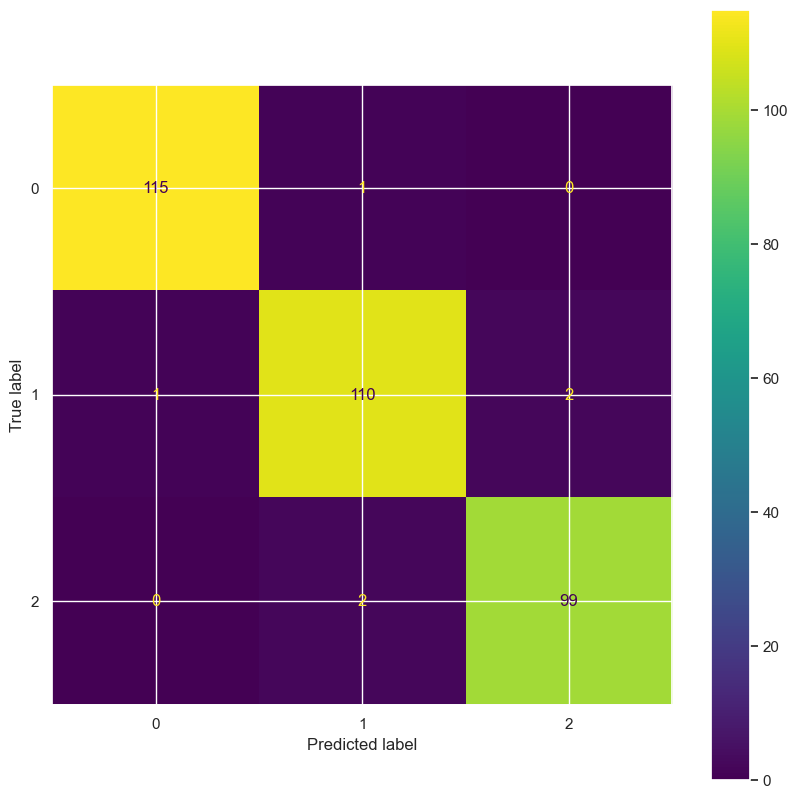

In [49]:
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot()
plt.show()

* The chance of lung cancer was predicted low for 115 patients who actually had a low chance of getting lung cancer (predicted correctly).
* The chance of lung cancer was predicted low for 1 patient who actually had a medium chance of getting lung cancer.
* The chance of lung cancer was predicted medium for 1 patient who actually had a low chance of getting lung cancer.
* The chance of lung cancer was predicted medium for 110 patients who actually had a medium chance of getting lung cancer (predicted correctly).
* The chance of lung cancer was predicted medium for 2 patients who actually had a high chance of getting lung cancer.
* The chance of lung cancer was predicted high for 2 patients who actually had a medium chance of getting lung cancer.
* The chance of lung cancer was predicted high for 99 patients who actually had a high chance of getting lung cancer (predicted correctly).